<a href="https://colab.research.google.com/github/MAHESWARI-ROUT/HouseRentPrediction_Model/blob/main/HouseRentPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading

In [34]:
#install kaggel
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"maheswarirout","key":"982d48a69cc669e61f1d9db3f28f7cbf"}'}

In [35]:
!mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [36]:
!cp kaggle.json ~/.kaggle/

In [37]:
!chmod 600 ~/.kaggle/kaggle.json


In [38]:
!kaggle datasets list

ref                                                                 title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                     DAIGT V2 Train Dataset                            29MB  2023-11-16 01:38:36           1915        188  1.0              
muhammadbinimran/housing-price-prediction-data                      Housing Price Prediction Data                    763KB  2023-11-21 17:56:32           8506        149  1.0              
thedevastator/books-sales-and-ratings                               Books Sales and Ratings                           53KB  2023-12-06 04:54:33           1971         28  1.0              
thedrcat/daigt-proper-train-dataset                    

In [39]:
!kaggle datasets download -d iamsouravbanerjee/house-rent-prediction-dataset

house-rent-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
!unzip house-rent-prediction-dataset.zip

Archive:  house-rent-prediction-dataset.zip
replace Dataset Glossary.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [41]:
# your code starts here
!pip install scikit-learn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [45]:
df=pd.read_csv("House_Rent_Dataset.csv")

In [11]:
df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [43]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [46]:


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [47]:
df.drop(columns = ['Posted On','Floor','Area Locality','Bathroom','Area Type','Furnishing Status'],inplace=True)
X=df.drop(columns=['Rent'])
Y=df['Rent']
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.20,random_state=96)
encoder = OneHotEncoder(sparse=False)
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.fit_transform(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
df.describe()

,BHK,Rent,Size
count,4746.000000,4.746000e+03,4746.000000
mean,2.083860,3.499345e+04,967.490729
std,0.832256,7.810641e+04,634.202328
min,1.000000,1.200000e+03,10.000000
25%,2.000000,1.000000e+04,550.000000
50%,2.000000,1.600000e+04,850.000000
75%,3.000000,3.300000e+04,1200.000000
max,6.000000,3.500000e+06,8000.000000


<Axes: xlabel='BHK', ylabel='count'>

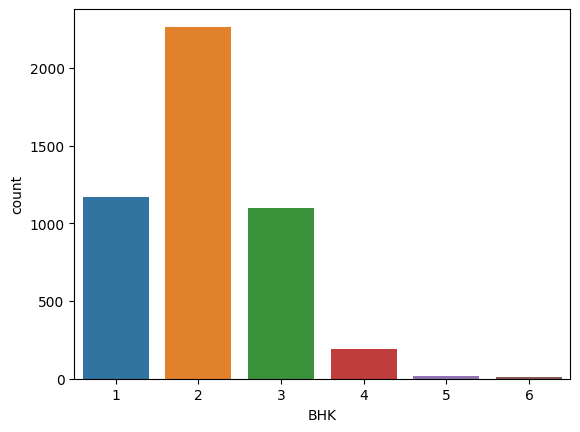

In [18]:
sns.countplot(df,x='BHK')

<Axes: >

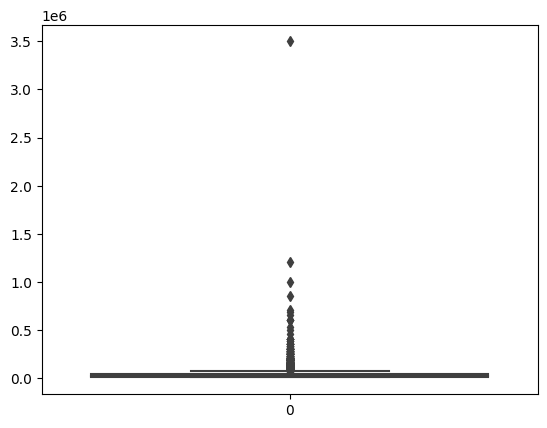

In [19]:
sns.boxplot(df['Rent'])

<Axes: xlabel='City', ylabel='count'>

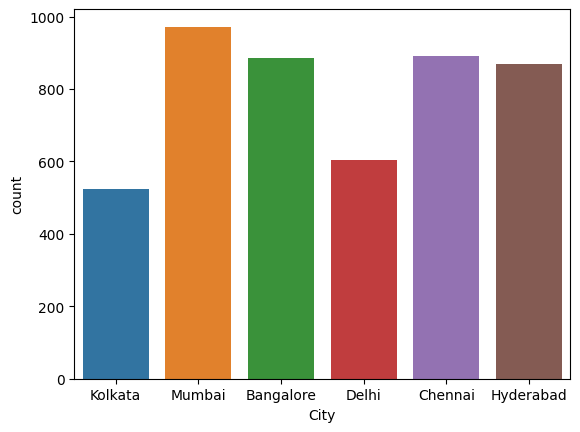

In [20]:
sns.countplot(df,x='City')

<Axes: xlabel='Size', ylabel='count'>

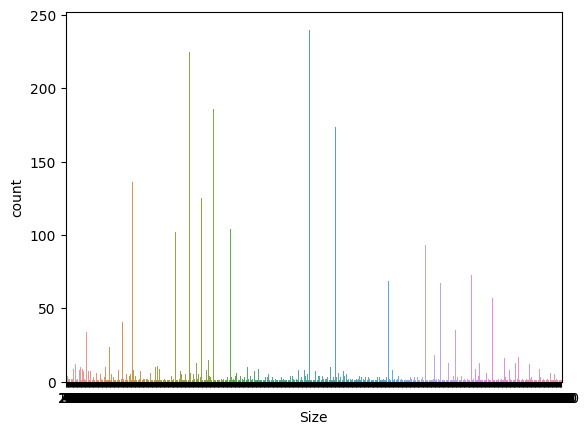

In [21]:
sns.countplot(df,x='Size')

In [22]:
Skew=df['Rent'].skew()
Skew

21.409942283288803

In [48]:
Q1=df['Rent'].quantile(0.25)
Q3=df['Rent'].quantile(0.75)
IQR=Q3-Q1
IQR

23000.0

In [49]:
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
df['Rent']=np.where(df['Rent']>upper_limit,upper_limit,np.where(df['Rent']<lower_limit,lower_limit,df['Rent']))

In [50]:
Skew1=df['Rent'].skew()
Skew1

1.16632707550604

In [51]:
Ind=df['Rent'][(df['Rent']>upper_limit)|(df['Rent']<lower_limit)].index
df.drop(Ind,inplace=True) # permanently changing the Fare column to avoid outliers

In [27]:
df.head()

,BHK,Rent,Size,City,Tenant Preferred,Point of Contact
0,2,10000.0,1100,Kolkata,Bachelors/Family,Contact Owner
1,2,20000.0,800,Kolkata,Bachelors/Family,Contact Owner
2,2,17000.0,1000,Kolkata,Bachelors/Family,Contact Owner
3,2,10000.0,800,Kolkata,Bachelors/Family,Contact Owner
4,2,7500.0,850,Kolkata,Bachelors,Contact Owner


In [52]:
from sklearn.ensemble import RandomForestClassifier         # random forest algorithm
# loading different machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [53]:
tf1 = ColumnTransformer(transformers=[('impute_City_Tenant Preferred_Point of Contact', OneHotEncoder(sparse=False, handle_unknown='ignore'), [1, 5])], remainder='passthrough')
tf2 = ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10))])
tf3 = SelectKBest(chi2, k=5)
tf4=RandomForestClassifier()
tf5=LogisticRegression()
tf6=SVC()


In [54]:
X.shape
Y.shape

(4746,)

In [58]:
pipe_line1=Pipeline(steps=[('tf1',tf1),
                     ('tf2',tf2),
                     ('tf3',tf3),
                     ('tf4',tf4)])
pipe_line2=Pipeline(steps=[('tf1',tf1),
                     ('tf2',tf2),
                     ('tf3',tf3),
                     ('tf5',tf5)])
pipe_line3=Pipeline(steps=[('tf1',tf1),
                     ('tf2',tf2),
                     ('tf3',tf3),
                     ('tf6',tf6)])
pipe_line4=Pipeline(steps=[('tf1',tf1),
                     ('tf2',tf2),
                     ('tf3',tf3),
                     ('tf6',tf6)])


In [59]:
from sklearn import set_config
set_config(display='diagram')
pipe_line1


Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_City_Tenant '
                                                  'Preferred_Point of Contact',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 5])])),
                ('tf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('tf3',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7820381752d0>)),
                ('tf4', RandomForestClassifier())])

In [61]:
pipe_line2

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_City_Tenant '
                                                  'Preferred_Point of Contact',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 5])])),
                ('tf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('tf3',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7820381752d0>)),
                ('tf5', LogisticRegression())])

In [62]:
pipe_line3

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_City_Tenant '
                                                  'Preferred_Point of Contact',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 5])])),
                ('tf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('tf3',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7820381752d0>)),
                ('tf6', SVC())])

In [63]:
pipe_line4

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_City_Tenant '
                                                  'Preferred_Point of Contact',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 5])])),
                ('tf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('tf3',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7820381752d0>)),
                ('tf6', SVC())])

In [64]:
# loading RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [65]:
# assinging different values to parameters of Logistic regression to enhance accuracy
#penalty=['l2',None,'elasticnet','l1']
tol=[3.333,4.00,7.8,0.006,-1]
C=[1.0,2.0,4.0,3.3]
class_weight=[None, 'balanced']
random_state=[None,32,42,59]
solver=['lbfgs','newton-cg','sag','liblinear']
max_iter=[200,150,300]
n_jobs=[1,-1,4,None]
verbose=[0,1,4,2]
logistic_params={'tf5__class_weight':class_weight,'tf5__tol':tol,'tf5__C':C,'tf5__random_state':random_state,'tf5__solver':solver,'tf5__max_iter':max_iter,'tf5__n_jobs':n_jobs,'tf5__verbose':verbose}

In [66]:
# applying RandomizedSearchCV
random_logistic=RandomizedSearchCV(pipe_line2,logistic_params,cv=5,scoring='accuracy',error_score='raise')
random_logistic.fit(x_train_encoded,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 1 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.10/dist-packages/

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('tf1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('impute_City_Tenant '
                                                                               'Preferred_Point '
                                                                               'of '
                                                                               'Contact',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               [1,
                                                                                5])])),
                                             ('tf2',
                                              ColumnTransformer(transformers=[('scale',
                                                                               MinMaxScaler(),
                                                                               slice(0, 10, None))])),
                                             ('tf3',
                                              SelectKBest(...
                                                          score_func=<function chi2 at 0x7820381752d0>)),
                                             ('tf5', LogisticRegression())]),
                   param_distributions={'tf5__C': [1.0, 2.0, 4.0, 3.3],
                                        'tf5__class_weight': [None, 'balanced'],
                                        'tf5__max_iter': [200, 150, 300],
                                        'tf5__n_jobs': [1, -1, 4, None],
                                        'tf5__random_state': [None, 32, 42, 59],
                                        'tf5__solver': ['lbfgs', 'newton-cg',
                                                        'sag', 'liblinear'],
                                        'tf5__tol': [3.333, 4.0, 7.8, 0.006,
                                                     -1],
                                        'tf5__verbose': [0, 1, 4, 2]},
                   scoring='accuracy')

In [67]:
# accuracy of logistic model
accuracy_logistic_model=random_logistic.best_score_
accuracy_logistic_model

0.06981173288953609